<a href="https://colab.research.google.com/github/bastienbg/Mastercamp-Certification-Project/blob/main/projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.4 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.1-py3-none-any.whl (238 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246767 sha256=038b79c1976ac552e220db99661be566dbd91ac3c81af35c30e01d67fda51656
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import fasttext
from collections import defaultdict
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import ipywidgets as widgets
from IPython.display import display


# Télécharger les ressources nécessaires NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
path = '/content/drive/MyDrive/Data/EPO.csv'

# Charger les stopwords et le lemmatizer de NLTK
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Fonction pour enlever les balises HTML
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Fonction pour nettoyer le texte adaptée pour FastText
def clean_text_fasttext(text):
    text = re.sub(r'[^\w\s]', '', text)  # Enlever tous les caractères non-alphanumériques sauf espaces
    text = text.lower()  # Convertir en minuscules
    text = re.sub(r'\d+', '', text)  # Enlever tous les chiffres
    text = re.sub(' +', ' ', text)  # Enlever les espaces multiples

    tokens = word_tokenize(text)  # Tokenisation avec NLTK
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]  # Lemmatisation et suppression des stopwords
    return ' '.join(tokens)



def is_list_string(s):
    try:
        # Essayer de convertir la chaîne en liste
        eval_result = eval(s)
        # Vérifier si le résultat est bien une liste
        return isinstance(eval_result, list)
    except:
        return False

def simplify_cpc(cpc_list_str):
  if isinstance(cpc_list_str, str) and re.match(r"\[\s*'.*'\s*(,\s*'.*'\s*)*\]", cpc_list_str):
        try:
            cpc_list = eval(cpc_list_str)  # Convertir la chaîne en liste
            simplified_cpc_list = [cpc.strip()[:2] for cpc in cpc_list]
            return simplified_cpc_list
        except Exception as e:
            print(f"Error: {e} for CPC: {cpc_list_str}")
  else:
        return 'na'



# Chargement des données

cols_to_use = ['claim', 'CPC']
df = pd.read_csv(path, nrows=50000, usecols=cols_to_use, encoding='latin1')



df['claim'] = df['claim'].astype(str)


# Nettoyage et prétraitement des descriptions
# Simplifier les labels CPC en utilisant uniquement la première lettre et les deux premiers chiffres
df['Primary_CPC_Simplified'] = df['CPC'].apply(simplify_cpc)

df['claim'] = df['claim'].apply(remove_html_tags)
df['Cleaned_Claim'] = df['claim'].apply(clean_text_fasttext)

print(f"Nombre de lignes après nettoyage HTML et texte : {len(df)}")

df.dropna(subset=['Cleaned_Claim'], inplace=True)
print(f"Nombre de lignes après suppression des NaN dans Cleaned_Claim : {len(df)}")

#df.drop_duplicates(subset=['Cleaned_Claim'], inplace=True)
#print(f"Nombre de lignes après suppression des doublons dans Cleaned_Claim : {len(df)}")

#df.reset_index(drop=True, inplace=True)





#Supprimer les lignes où 'Primary_CPC_Simplified' est 'na'
df = df[df['Primary_CPC_Simplified'] != 'na']
print(f"Nombre de lignes après suppression des NaN dans Cleaned_Claim : {len(df)}")

print(f"Nombre de lignes dans le DataFrame : {len(df)}")



# Définir une fonction pour afficher les informations de manière interactive
def display_information(index):
    print(f"Index: {index}")
    print(f"CPC: {df.loc[index, 'CPC']}")
    print(f"Cleaned Claim: {df.loc[index, 'Cleaned_Claim']}")
    print(f"Primary CPC Simplified: {df.loc[index, 'Primary_CPC_Simplified']}")
    print()

# Créer un widget Dropdown pour sélectionner l'index à afficher
index_dropdown = widgets.Dropdown(
    options=df.index,
    description='Select Index:',
    disabled=False,
)

# Créer un widget Button pour actualiser l'affichage lorsque l'index est sélectionné
refresh_button = widgets.Button(
    description='Refresh',
    disabled=False,
    button_style='info',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to refresh display',
    icon=''
)

# Définir une fonction de gestionnaire d'événements pour le bouton Refresh
def on_refresh_button_clicked(b):
    index = index_dropdown.value
    display_information(index)

# Associer la fonction de gestionnaire d'événements au clic du bouton Refresh
refresh_button.on_click(on_refresh_button_clicked)

# Afficher les widgets Dropdown et Button
display(widgets.HBox([index_dropdown, refresh_button]))

# Afficher les informations initiales pour l'index sélectionné par défaut
initial_index = index_dropdown.value
display_information(initial_index)

Nombre de lignes après nettoyage HTML et texte : 50000
Nombre de lignes après suppression des NaN dans Cleaned_Claim : 50000
Nombre de lignes après suppression des NaN dans Cleaned_Claim : 50000
Nombre de lignes dans le DataFrame : 50000


Index: 0
CPC: ['B23K26-361', 'H04M1-0266', 'B23K26-402', 'G06F1-1626', 'G06F1-1656', 'G06F1-1637', 'G02F1-133308', 'B23K2101-34', 'B23K2101-40', 'B23K2103-42', 'B23K2103-172', 'G02F1-133331']
Cleaned Claim: method manufacturing cover window display panel comprisingforming first coating layer upper surface plastic layer performing mechanical processing edge plastic layer edge first coating layer produce desired shape andperforming laser processing edge first coating layer performing mechanical processingthe method claim wherein edge cover window includesa side part perpendicular upper surface plastic layera first inclined part extending side part first parallel part extending first inclined part parallel upper surface plastic layer anda second inclined part extending first horizontal part upper surface plastic layer andwherein side part first inclined part formed mechanical processingthe method claim whereinthe first parallel part second inclined part formed laser processingthe method c

In [ ]:
occurrences = df['Primary_CPC_Simplified'].value_counts().reset_index()
occurrences.columns = ['Primary_CPC_Simplified', 'Count']
occurrences

,Primary_CPC_Simplified,Count
0,"[H0, H0, H0]",1420
1,"[G0, G0]",1397
2,"[G0, G0, G0]",1284
3,"[H0, H0, H0, H0]",1278
4,"[H0, H0]",1164
...,...,...
14205,"[F1, F2, F2, F2, F2, B2]",1
14206,"[B3, B3, B3, B2, B3, B2, B2, B2, B2, B2, B2, B...",1
14207,"[C0, C0, C0, C0, C0, H0, H0, H0, H0, G0, H0, C...",1
14208,"[E0, E0, E0, E0, E0, E0, E0, E0, E0, E0, E0, E...",1


In [ ]:
# Compter les occurrences de chaque code CPC
df_exploded = df.explode('Primary_CPC_Simplified')  # Séparer les listes en lignes individuelles
cpc_counts = df_exploded['Primary_CPC_Simplified'].value_counts().reset_index()
cpc_counts.columns = ['Primary_CPC_Simplified', 'Count']
cpc_counts_sorted = cpc_counts.sort_values(by='Count')
cpc_counts_sorted

,Primary_CPC_Simplified,Count
30,C4,22
29,Y1,118
28,D1,167
27,G2,187
26,C3,201
25,F4,229
24,B8,251
23,E2,314
22,D2,453
21,A0,2013


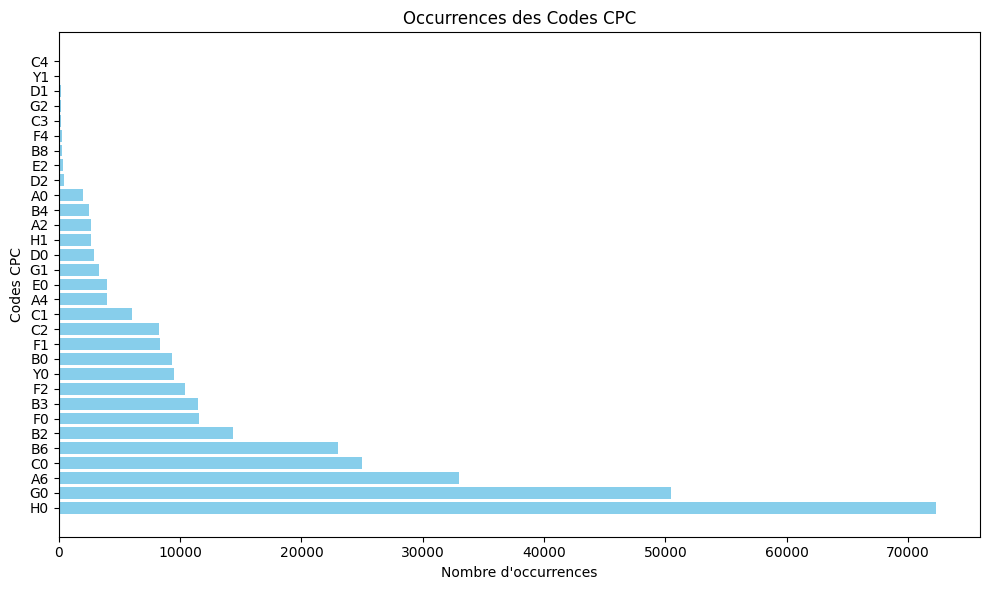

In [ ]:
import matplotlib.pyplot as plt

# Données pour l'axe des x et des y
cpcs = cpc_counts_sorted['Primary_CPC_Simplified']
counts = cpc_counts_sorted['Count']

# Création de l'histogramme
plt.figure(figsize=(10, 6))  # Taille de la figure (largeur, hauteur)

plt.barh(cpcs, counts, color='skyblue')  # Barres horizontales avec couleur

# Personnalisation du graphique
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Codes CPC')
plt.title('Occurrences des Codes CPC')  # Titre du graphique

plt.gca().invert_yaxis()  # Inversion de l'axe y pour afficher les plus grandes valeurs en haut

plt.tight_layout()

# Affichage du graphique
plt.show()


In [ ]:
na_rows = df[df['Primary_CPC_Simplified'] == 'na']

if len(na_rows) == 0:
    print("Il n'y a aucune ligne qui manque d'informations")
else:
    print(na_rows[['CPC', 'Primary_CPC_Simplified']])


Il n'y a aucune ligne qui manque d'informations


In [ ]:
# Fonction pour expliquer la classification et mettre en avant les mots clés
def explain_classification(text, model, train):
    cleaned_text = clean_text_fasttext(text)
    predictions = model.predict(cleaned_text, k=2)  # k=-1 pour avoir tous les labels
    pred_labels = predictions[0]
    keywords_importance_list = []
    for pred_label in pred_labels:
        pred_label = pred_label.replace('__label__', '')
        keywords = extract_keywords_for_class(pred_label, train)
        keyword_importance = calculate_keyword_importance(cleaned_text, keywords, model)
        keywords_importance_list.append((pred_label, keyword_importance))
    return keywords_importance_list

# Fonction pour extraire les mots clés importants pour une classe CPC donnée
def extract_keywords_for_class(cpc_code, train):
    examples = train[train['Primary_CPC_Simplified'].apply(lambda x: cpc_code in x)]['Cleaned_Claim'].tolist()
    word_freq = defaultdict(int)
    for example in examples:
        tokens = example.split()
        for token in tokens:
            word_freq[token] += 1
    sorted_keywords = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    return [word for word, freq in sorted_keywords[:10]]

def calculate_keyword_importance(cleaned_text, keywords, model):
    word_weights = {}
    for keyword in keywords:
        weight = model.get_word_vector(keyword)
        word_weights[keyword] = np.linalg.norm(weight)
    sorted_keywords = sorted(word_weights.items(), key=lambda x: x[1], reverse=True)
    return sorted_keywords

# Fonction pour calculer la fréquence des mots par classe
def calculate_word_frequencies(df):
    class_word_freq = defaultdict(lambda: defaultdict(int))
    for _, row in df.iterrows():
        label = row['Primary_CPC_Simplified']
        words = row['Cleaned_Claim'].split()
        for word in words:
            class_word_freq[label][word] += 1
    return class_word_freq


# Fonction pour expliquer la classification d'un texte long
def explain_text_classification(long_text, model, train):
    cleaned_long_text = clean_text_fasttext(long_text)
    keyword_importance_list = explain_classification(cleaned_long_text, model, train)
    for pred_label, keyword_importance in keyword_importance_list:
        print(f"Code CPC prédit: {pred_label}")
        print(f"Importance des mots-clés: {keyword_importance}")




# Séparation des données en ensembles d'entraînement et de test
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Préparation des données pour FastText
train['final_data'] = train.apply(lambda row: ' '.join([f"__label__{label}" for label in row['Primary_CPC_Simplified']]) + " " + row['Cleaned_Claim'], axis=1)
test['final_data'] = test.apply(lambda row: ' '.join([f"__label__{label}" for label in row['Primary_CPC_Simplified']]) + " " + row['Cleaned_Claim'], axis=1)

# Sauvegarde des données pour FastText
train.to_csv('train_fasttext.csv', columns=['final_data'], index=False, header=False)
test.to_csv('test_fasttext.csv', columns=['final_data'], index=False, header=False)

# Entraînement du modèle FastText avec des hyperparamètres optimisés
model = fasttext.train_supervised(
    input="train_fasttext.csv",
    lr=0.5,          # Taux d'apprentissage augmenté
    epoch=12,        # Nombre d'époques augmenté
    wordNgrams=2,    # Utilisation des bigrammes
    dim=100,          # Dimension des vecteurs augmentée
    loss='ova'
)

# Définition des widgets pour l'interface utilisateur
text_input = widgets.Textarea(
    placeholder='Saisissez votre texte ici...',
    description='Texte:',
    disabled=False
)

output = widgets.Output()

# Fonction de gestionnaire d'événements pour le bouton de prédiction
def on_predict_button_clicked(b):
    with output:
        output.clear_output()
        if text_input.value.strip() == "":
            print("Erreur: Veuillez saisir un texte.")
            return
        explain_text_classification(text_input.value, model, train)

# Création du bouton de prédiction
predict_button = widgets.Button(
    description='Prédire CPC',
    disabled=False,
    button_style='info',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Cliquez pour prédire le CPC',
    icon=''
)

# Associer la fonction de gestionnaire d'événements au clic du bouton
predict_button.on_click(on_predict_button_clicked)

# Affichage de l'interface utilisateur
display(text_input, predict_button, output)


Textarea(value='', description='Texte:', placeholder='Saisissez votre texte ici...')

Button(button_style='info', description='Prédire CPC', style=ButtonStyle(), tooltip='Cliquez pour prédire le C…

Output()

In [ ]:
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# Fonction pour simplifier le premier code CPC en ne gardant que les deux premiers caractères
def simplify_first_cpc(cpc_list_str):
    try:
        if pd.isna(cpc_list_str) or not isinstance(cpc_list_str, str) or not is_list_string(cpc_list_str):
            return 'na'
        # Convertir la chaîne de caractères en liste
        cpc_list = eval(cpc_list_str)
        if not isinstance(cpc_list, list) or len(cpc_list) == 0:
            return 'na'
        # Prendre le premier code CPC dans la liste et simplifier
        first_cpc = cpc_list[1]
        simplified_cpc = first_cpc[:2]  # Prendre les deux premiers caractères
        return simplified_cpc
    except Exception as e:
        return 'na'

# Appliquer cette fonction à la colonne des codes CPC
df['Second_CPC_Simplified'] = df['CPC'].apply(simplify_first_cpc)
df = df[df['Second_CPC_Simplified'] != 'na']

# Vérifier le nombre de classes uniques après simplification
unique_classes = df['Second_CPC_Simplified'].unique()

def display_keywords_for_classes(df):
    # Charger les données vectorisées
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    X = tfidf_vectorizer.fit_transform(df['Cleaned_Claim'])

    # Simplifier les labels CPC
    y = df['Second_CPC_Simplified']

    # Entraîner un modèle de régression logistique
    log_reg_model = LogisticRegression(max_iter=1000)
    log_reg_model.fit(X, y)

    # Obtenir les coefficients du modèle
    coefficients = log_reg_model.coef_

    # Obtenir les mots les plus importants pour chaque classe CPC simplifiée
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Récupérer toutes les classes CPC uniques présentes dans les données
    unique_classes = df['Second_CPC_Simplified'].unique()

    # Préparer les données pour le tableau
    table_data = []
    for cpc_code in unique_classes:
        if cpc_code in log_reg_model.classes_:
            idx = list(log_reg_model.classes_).index(cpc_code)
            top_features = coefficients[idx].argsort()[-10:][::-1]
            top_words = [feature_names[i] for i in top_features]
            table_data.append([f"CPC {cpc_code}", ', '.join(top_words)])

    # Afficher le tableau avec tabulate
    headers = ["Classe CPC", "Mots-clés"]
    print("Tableau des mots clés pour chaque classe CPC :")
    print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))



# Exemple d'utilisation
display_keywords_for_classes(df)


Tableau des mots clés pour chaque classe CPC :
╒══════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Classe CPC   │ Mots-clés                                                                                               │
╞══════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ CPC H0       │ network, battery, antenna, hearing, electrolyte, resource, separator, contact, semiconductor, packet    │
├──────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ CPC A6       │ implant, surgical, absorbent, distal, patient, endoscope, blood, dental, oral, medical                  │
├──────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ CPC D0       │ laundry, yarn, washing, textile, fiber, drum, fabric, spinning, filament, m

In [ ]:
import fasttext
import pandas as pd
from sklearn.metrics import (
    f1_score, precision_score, recall_score, hamming_loss, accuracy_score
)



# Évaluer le modèle sur l'ensemble de test
result = model.test("test_fasttext.csv")
print(f"\nNombre d'exemples: {result[0]}")
print(f"Précision: {result[1]}")
print(f"Rappel: {result[2]}")

# Calculer le score F1 et autres métriques
test_df = pd.read_csv('test_fasttext.csv', header=None)
y_true = [line.split()[0] for line in test_df[0]]  # Extraction des étiquettes réelles

y_pred = []
for line in test_df[0]:
    text = " ".join(line.split()[1:])
    pred_label = model.predict(text)[0][0]
    y_pred.append(pred_label)

# Convertir les labels pour les métriques
y_true = [label.replace('__label__', '') for label in y_true]
y_pred = [label.replace('__label__', '') for label in y_pred]

# Calcul des métriques
f1_weighted = f1_score(y_true, y_pred, average='weighted', zero_division=0)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1_micro = f1_score(y_true, y_pred, average='micro', zero_division=0)
f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
hamming = hamming_loss(y_true, y_pred)
exact_match_ratio = accuracy_score(y_true, y_pred)
subset_accuracy = accuracy_score(y_true, y_pred)

# Affichage des résultats
print("F1 score (weighted):", f1_weighted)
print("Précision (weighted):", precision)
print("Rappel (weighted):", recall)
print("F1 score (micro):", f1_micro)
print("F1 score (macro):", f1_macro)
print("Hamming loss:", hamming)
print("Exact match ratio:", exact_match_ratio)
print("Subset accuracy:", subset_accuracy)



Nombre d'exemples: 10000
Précision: 0.8145
Rappel: 0.1270234864788996
F1 score (weighted): 0.6565708525637832
Précision (weighted): 0.6806907746739621
Rappel (weighted): 0.65
F1 score (micro): 0.65
F1 score (macro): 0.4381743245504702
Hamming loss: 0.35
Exact match ratio: 0.65
Subset accuracy: 0.65


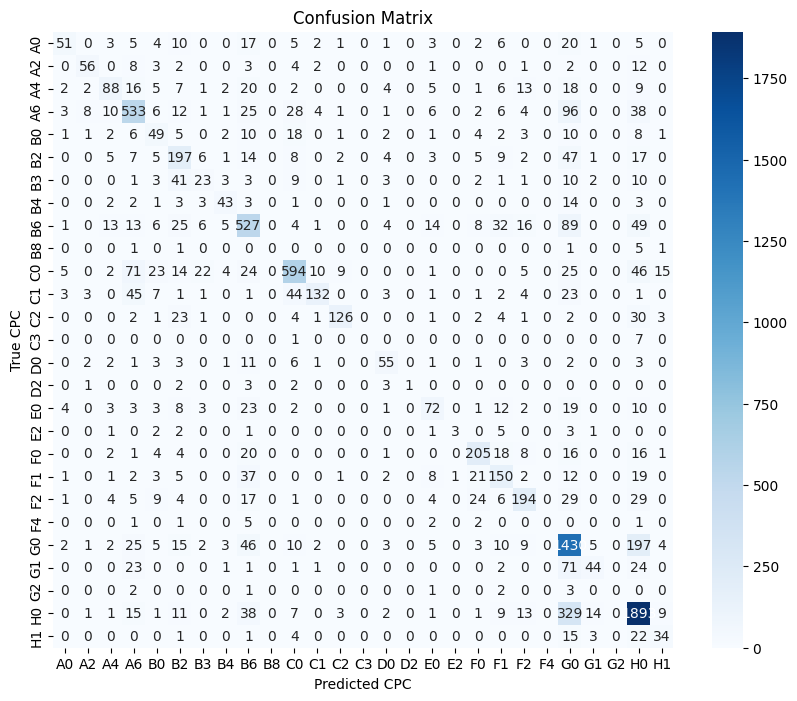

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))

# Extraire les codes CPC des labels
unique_labels = np.unique(y_true)
cpc_codes = [label.replace('__label__', '') for label in unique_labels]

# Afficher la matrice de confusion sous forme de heatmap avec les codes CPC
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cpc_codes, yticklabels=cpc_codes)
plt.xlabel('Predicted CPC')
plt.ylabel('True CPC')
plt.title('Confusion Matrix')
plt.show()


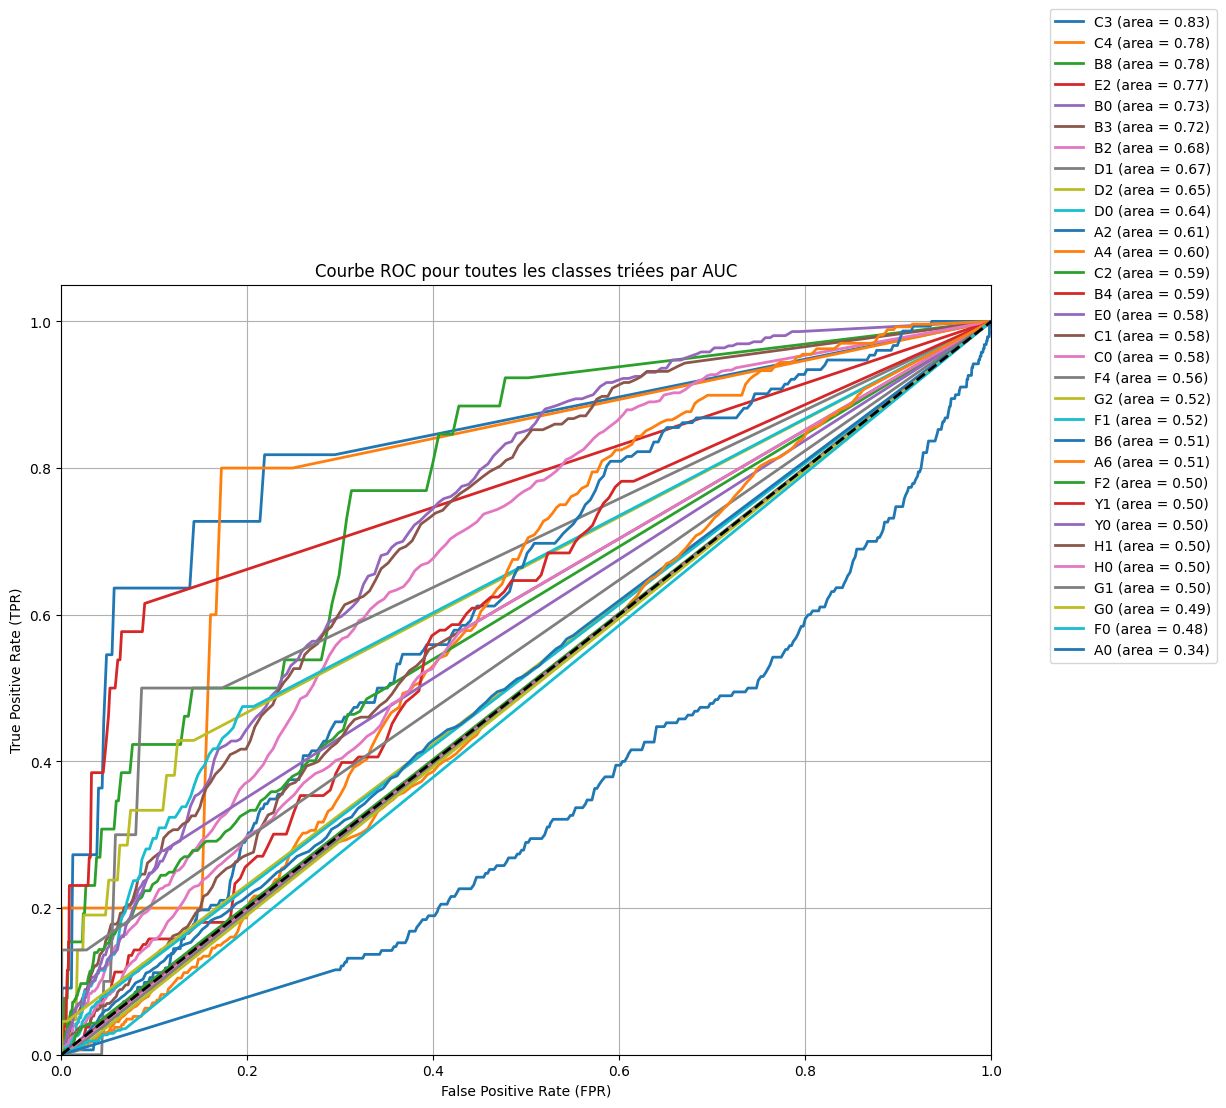

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

# Préparer les données pour la génération des courbes ROC
y_true = test['Primary_CPC_Simplified']
texts = test['Cleaned_Claim'].apply(clean_text_fasttext)

# Obtenir les prédictions du modèle
y_pred_scores = np.array([model.predict(text, k=-1)[1] for text in texts])

# Binariser les étiquettes pour les courbes ROC
mlb = MultiLabelBinarizer()
y_true_bin = mlb.fit_transform(y_true)

# Calculer la courbe ROC et l'AUC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, label in enumerate(mlb.classes_):
    fpr[label], tpr[label], _ = roc_curve(y_true_bin[:, i], y_pred_scores[:, i])
    roc_auc[label] = auc(fpr[label], tpr[label])

# Trier les classes par AUC en ordre décroissant
sorted_classes = sorted(mlb.classes_, key=lambda x: roc_auc[x], reverse=True)

# Plotter les courbes ROC pour toutes les classes
plt.figure(figsize=(12, 10))
for label in sorted_classes:
    plt.plot(fpr[label], tpr[label], lw=2, label=f'{label} (area = {roc_auc[label]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Courbe ROC pour toutes les classes triées par AUC')
plt.legend(loc="lower right", bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

# Préparer les données pour la génération des courbes ROC
y_true = test['Primary_CPC_Simplified']
texts = test['Cleaned_Claim'].apply(clean_text_fasttext)

# Obtenir les prédictions du modèle
y_pred_scores = np.array([model.predict(text, k=-1)[1] for text in texts])

# Binariser les étiquettes pour les courbes ROC
mlb = MultiLabelBinarizer()
y_true_bin = mlb.fit_transform(y_true)

# Calculer la courbe ROC et l'AUC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, label in enumerate(mlb.classes_):
    fpr[label], tpr[label], _ = roc_curve(y_true_bin[:, i], y_pred_scores[:, i])
    roc_auc[label] = auc(fpr[label], tpr[label])

# Sélectionner un nombre limité de classes à afficher (par exemple, les 5 premières classes par AUC)
top_classes = sorted(mlb.classes_, key=lambda x: roc_auc[x], reverse=True)[:5]

# Plotter les courbes ROC pour les classes sélectionnées
plt.figure(figsize=(10, 8))
for label in top_classes:
    plt.plot(fpr[label], tpr[label], lw=2,
             label=f'{label} (area = {roc_auc[label]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Courbe ROC pour les 5 meilleures classes')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

# Préparer les données pour la génération des courbes ROC
y_true = test['Primary_CPC_Simplified']
texts = test['Cleaned_Claim'].apply(clean_text_fasttext)

# Obtenir les prédictions du modèle
y_pred_scores = np.array([model.predict(text, k=-1)[1] for text in texts])

# Binariser les étiquettes pour les courbes ROC
mlb = MultiLabelBinarizer()
y_true_bin = mlb.fit_transform(y_true)

# Calculer la courbe ROC et l'AUC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, label in enumerate(mlb.classes_):
    fpr[label], tpr[label], _ = roc_curve(y_true_bin[:, i], y_pred_scores[:, i])
    roc_auc[label] = auc(fpr[label], tpr[label])

# Sélectionner les 5 dernières classes par AUC (les moins élevées)
bottom_classes = sorted(mlb.classes_, key=lambda x: roc_auc[x])[:5]

# Plotter les courbes ROC pour les classes sélectionnées
plt.figure(figsize=(10, 8))
for label in bottom_classes:
    plt.plot(fpr[label], tpr[label], lw=2,
             label=f'{label} (area = {roc_auc[label]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Courbe ROC pour les 5 moins bonnes classes')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Fonction de gestionnaire d'événements pour le bouton de prédiction
def on_predict_button_clicked(b):
    with output:
        output.clear_output()
        if text_input.value.strip() == "":
            print("Erreur: Veuillez saisir un texte.")
            return
        explain_text_classification(text_input.value, model, train)

        # Afficher les résultats de prédiction
        cleaned_text = clean_text_fasttext(text_input.value)
        predictions = model.predict(cleaned_text, k=3)  # Prédire les top-3 labels
        pred_labels = predictions[0]

        print(f"Texte: {text_input.value}")
        for i, label in enumerate(pred_labels):
            print(f"Prediction {i+1}: {label.replace('__label__', '')}")

# Définition des widgets pour l'interface utilisateur
text_input = widgets.Textarea(
    placeholder='Saisissez votre texte ici...',
    description='Texte:',
    disabled=False,
    layout=widgets.Layout(width='80%', height='80px')
)

predict_button = widgets.Button(
    description='Prédire CPC',
    disabled=False,
    button_style='info',
    tooltip='Cliquez pour prédire le CPC',
    icon='check'
)

output = widgets.Output()

# Associer les fonctions de gestionnaire d'événements aux clics des boutons
predict_button.on_click(on_predict_button_clicked)

# Affichage de l'interface utilisateur
display(widgets.VBox([text_input, predict_button, output]))


Code CPC prédit: G0
Importance des mots-clés: [('data', 4.862845), ('method', 3.9534705), ('claim', 3.4523466), ('wherein', 2.7394764), ('device', 2.5141659), ('according', 2.5008667), ('one', 2.4743898), ('second', 2.3079846), ('least', 1.8868175), ('first', 1.6213461)]
Code CPC prédit: H0
Importance des mots-clés: [('method', 3.9534705), ('information', 3.5996437), ('claim', 3.4523466), ('configured', 3.4190478), ('wherein', 2.7394764), ('device', 2.5141659), ('according', 2.5008667), ('one', 2.4743898), ('second', 2.3079846), ('first', 1.6213461)]
Code CPC prédit: B4
Importance des mots-clés: [('ink', 7.709837), ('printing', 7.420567), ('liquid', 4.013603), ('claim', 3.4523466), ('layer', 2.8570764), ('wherein', 2.7394764), ('according', 2.5008667), ('one', 2.4743898), ('second', 2.3079846), ('first', 1.6213461)]
Texte: image forming apparatus characterized includesan image processing unit performs image processing first printing dataa storage device storing second printing data und